# Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pywaffle import Waffle
import numpy as np

from scipy.stats import shapiro, pearsonr, chi2_contingency, randint, uniform

from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


------------------------------------

# Load Data

In [3]:
#Load Data
df_ori = pd.read_csv("Odyssey 1  Data Set - Telco Data.csv")
df = df_ori.copy()
pd.set_option('display.max_columns', None)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#Decode SeniorCitizen Columns for EDA purposes
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Change data type of TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
#Missing value check
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#view missing value on TotalCharges
mis_val = df[df['TotalCharges'].isna()]
mis_val

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
#Missing value handling and recheck
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#Duplicate value check
df.duplicated().sum()

np.int64(0)

In [12]:
#Target value check
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Level 1 Insight

> **Decoding the Mystical Gaps**

As Mario ventured further into the Data Kingdom, he stumbled upon two challenges. First, there were strange voids in the terrain, hidden traps where valuable information about `TotalCharges` was mysteriously absent.   
Upon investigation, Mario realized these voids belonged to newcomers with **Zero Tenure**. These were fresh inhabitans of the kingdom who hadn't yet made any payments.  

To secure the land and prevent these voids from causing chaos, Mario swung hi Resilience Hammer and made a decision :   
* Missing values in `TotalCharges` were filled with 0, reflecting the natural state of these newcomers who hadn't accumulated charges. This simple yet effective fix ensured that no gaps would derail the exploration mission.  

Next, Mario noticed an even stranger phenomenon in the `SeniorCitizen` column, a puzzling numeric code, where **0** meant "No" and **1** meant "Yes". While the numbers made sense to the land's guardians, they were cryptic to Mario and his companions. To make the terrain easier to read, he used hi **Decoding** Lens to transform these numbers into meaningful labels :   
* `SeniorCitizen` was decoded from numeric symbols (0/1) into clear categories: "No" and "Yes".  

This decoding unlocked a clearer understanding of the kingdom's inhabitants and their traits, making the data terrain easier to navigate.  

With the voids filled and the code cracked, Mario's path through the Data Kingdom is now clear, setting the stage for the next phase: uncovering hidden patterns, trends, and anomalies in this magical land  

------------------------------

# Exploratory Data Analysis

In [13]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In the Data Kingdom, Mario uncovered valuable insights into the financial lives of the kingdom's residents.  
The average `tenure` was **32 months**, with some residents just beginning their journey while others had been around for many years, representing both newcomers and long-term inhabitants.  
The `MonthlyCharges` showed a wide range, from those with more modest expenses to residents who opted for premium services, illustrating the diversity in their choices.  
For `TotalCharges`, Mario found that most had spent an average of **2279.73** coins, with longer-term residents contributing more to the kingdom's economy. 

These insights highlighted that newer and higher-paying residents might be more prone to `churn`, requiring Mario to keep a vigilant watch on their activities as he continued his exploration.  

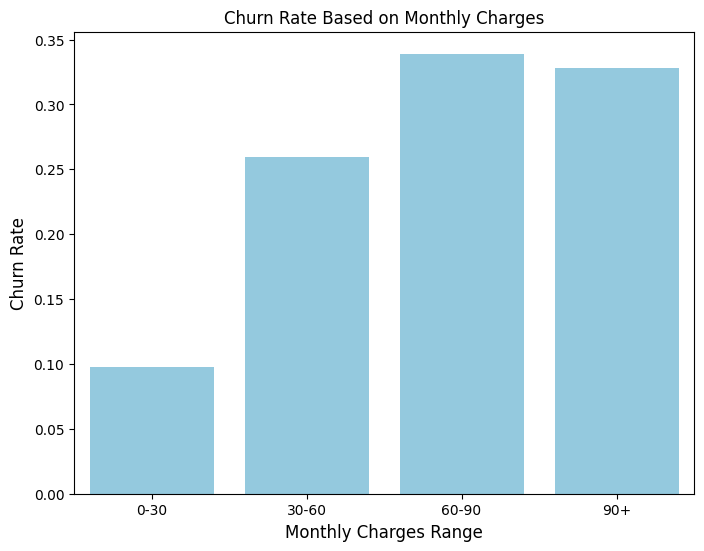

In [14]:
bins = [0, 30, 60, 90, 120]
labels = ['0-30', '30-60', '60-90', '90+']
df['MonthlyChargesBin'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels)

churn_rate = df.groupby('MonthlyChargesBin', observed=False)['Churn'].apply(lambda x: (x == 'Yes').mean())

plt.figure(figsize=(8,6))
sns.barplot(x=churn_rate.index, y=churn_rate.values, color='skyblue')
plt.title('Churn Rate Based on Monthly Charges', fontsize=12)
plt.xlabel('Monthly Charges Range', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.show()


In [15]:
df.drop(columns=['MonthlyChargesBin'], inplace=True)

As Mario ventured deeper into the Data Kingdom, he discovered a new challenge in the form of `Churn Rate`, a measure of how many residents were choosing to leave the kingdom after becoming part of it. Mario knew that pricing played a key role in the decision-making process, much like the cost of power-ups in his own adventures. So, he divided the residents into four groups based on their monthly charges: **0-30**, **30-60**, **60-90**, and **90+**, and ventured into each group to understand the forces at play.

- Lower `MonthlyCharges` (**0-30** coins) had the lowest `churn rate` (**10%**), as these residents were satisfied with the kingdom
- As the charges increased to **30-60** coins, the `churn rate` rose to **25%**, indicating that higher costs began to frustrate residents
- At the **60-90** coins range, `churn` peaked at **35%**, signaling the toughest challenge for residents, where dissatisfaction was at its highes.
- Finally, residents paying **90+** coins faced high `churn rates` (**34%**), though slightly lower than the previous range, showing that high costs continue to push residents away.

As `MonthlyCharges` rise, `Churn rate` increases. Targeting residents in the **30-90** coins range with special offers could help reduce `churn`, keeping them engaged and reducing dissatisfaction

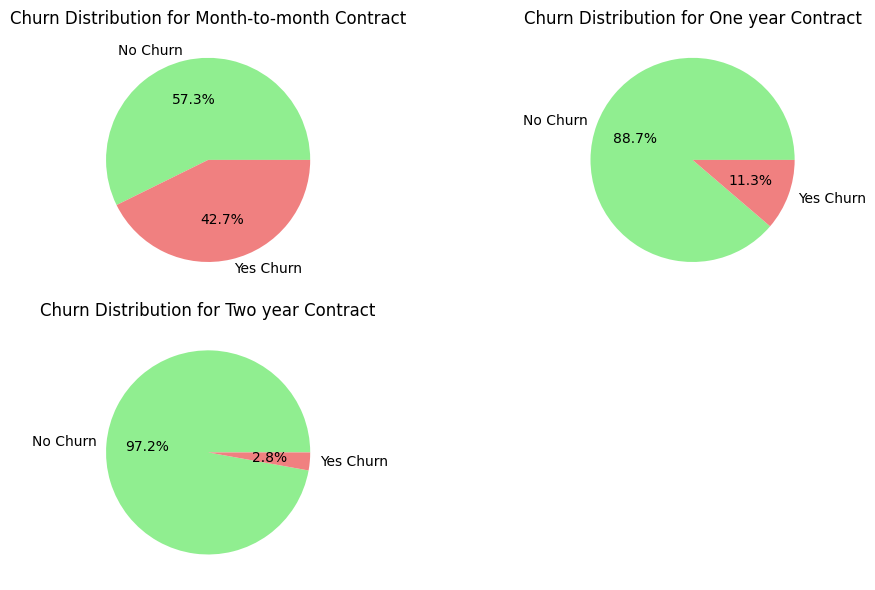

In [16]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack().fillna(0)

plt.figure(figsize=(10,6))
for idx, contract_type in enumerate(contract_churn.index):
    plt.subplot(2, 2, idx+1)
    contract_churn.loc[contract_type].plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen','lightcoral'], labels=['No Churn', 'Yes Churn'])
    plt.title(f'Churn Distribution for {contract_type} Contract', fontsize=12)
    plt.ylabel('')

plt.tight_layout()
plt.show()

As Mario ventured deeper into the **Contract Realm** of the Data Kingdom, he discovered that the length of a resident's commitment to the kingdom greatly influenced their likelihood to stay. This was evident in the `Churn Rates` across different `types of contracts`. Lets break it down : 

**Month-to-Month Contracts**
- `Churn Rate` = 42.7%
- The `Churn rate` for **month-to-month** contracts is the highest, indicating that many residents in this category are fickle, often moving in and out of the kingdom. This suggests they might not feel deeply connected or satisfied. 
- Possible cause : short-term nature of the contracts allows residents to leave at will, with minimal obstacles, and perhaps these residents feel that the servises do not meet their needs, leading them to seek greener pastures.
- Improvements : Mario realized that these residents need more encouragement to stay. The kingdom could offer personalized offers, loyalty rewards, or improve customer service to help lower the `churn rate`

**One-Year Contracts**
- `Churn Rate` = 11.3%
- With the **One-Year contracts**, the `churn rate` drops significantly. These residents seem more committed to staying in the kingdom for a longer time, likely due to better experiences or incentives. They are the loyal villagers of the kingdom.
- Possible cause for the drop in churn : Committing for a year suggests a greater level of contentment with what the kingoms offered them, and the kingdom may have begun offering incentives that encourage longer stays, resulting in higher retention rates.
- Improvements : Mario saw an opportunity to strengthen loyalty. The kingdom could introduce more rewards for long-term stays and encourage residents to upgrade to **two-year contracts**.

**Two-Year Contracts**
- `Churn Rate` = 2.8%
- The **two-year contract** holders are the kingdom's mos steadfast residents, with the lowest `churn rate`. These long-term residents are either deeply satisfied or face significant **switching costs**, they're in it for the long haul, building roots in the kingdom.
- Possible reason for them to stay : the two-year commitment often comes with penalties for leaving, making it harder for residents to depart. These residents is also very likely content with the kingdom's offering and have been rewarded for their loyalty, adding a sense of belonging. 
- improvements : Mario knew that these residents were the backbone of the kingdom's stability. To keep them loyal, the kingdom should maintain high satisfaction levels and consider extra incentives for these steadfast residents

In [17]:
df['ResidentType'] = df.apply (lambda row:
                               'Single' if row['Partner'] == 'No' and row['Dependents'] =='No'
                               else 'Family-Oriented', axis=1)

In [18]:
resident_churn = df.groupby(['ResidentType', 'Churn']).size().unstack()
resident_churn_percentage = (resident_churn.div(resident_churn.sum(axis=1), axis=0) * 100)

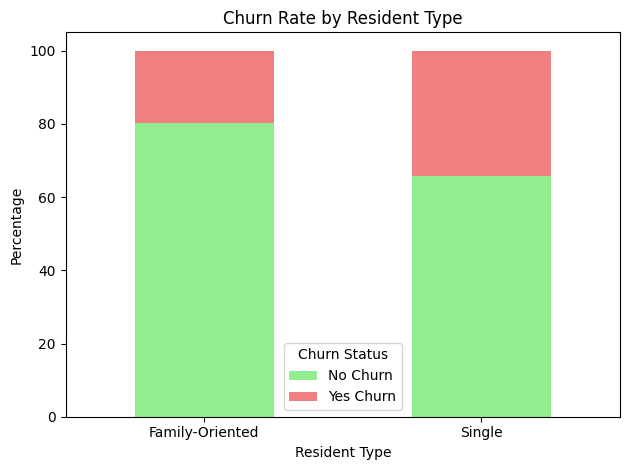

In [19]:
resident_churn_percentage.plot(kind='bar', stacked=True, color=['lightgreen','lightcoral'])
plt.title('Churn Rate by Resident Type')
plt.xlabel('Resident Type')
plt.ylabel('Percentage')
plt.legend(['No Churn', 'Yes Churn'], title='Churn Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
df.drop(columns=['ResidentType'], inplace=True)

Mario continued with his journey only to discovered two district groups of residents : 
- **Single** Explorers, brave but solitary travelers navigating the kingdom on their own
- **Family-Oriented** Adventurers, journeying through the realm with companions and shared responsibilities.
Mario quickly noticed that the **Single** Explorers were far more likely to vanish from the kingdorm (`churn`) than the **Family-Oriented** Adventurers. The chart revealed that these lone travelers often left the kingdom's magical lands in search of other opportunities.

*Possible cause* : 
- **Single** Explorers often had fewer ties to the kingdom, making it easier for them to leave when faced with challenges like rising costs or new adventures elsewhere
- Traveling solo meant that **Single** Explorers bore the full brunt of financial burdens, leaving them more sensitive to changes in service or pricing.
- **Familiy-Oriented** adventurers often felt a stronger sense of connection to the kingdom, staying longer due to shared responsibilities and the support of their companions.

*Recommendation* : 
- Exclusive Perks for Solo Travelers : Flexible contracts tailored for **single** explorers, or bonus "power-ups" like discounts or personalized offers for long-term stays
- Coins for Loyalty : Introduce loyalty rewards or financial incentives for explorers who remain committed to the kingdom for a longer time
- Organize magical events to bring **Single** Explorers together, fostering a sense of belonging and connection

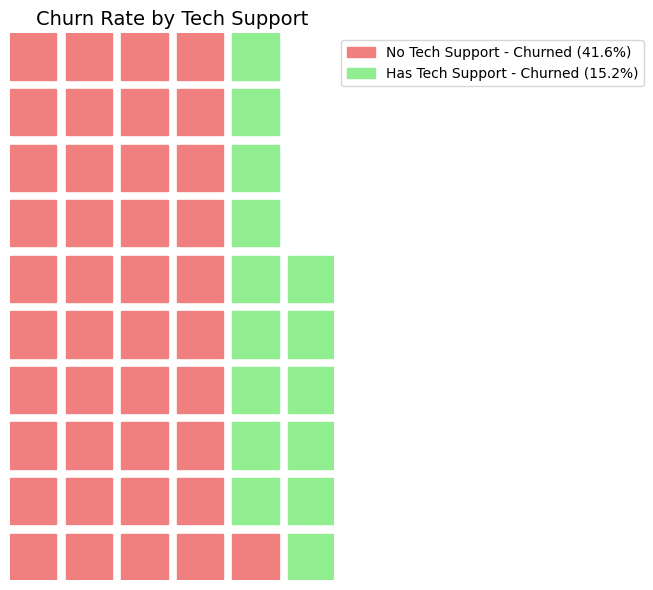

In [21]:
tech_support_filtered = df[df['TechSupport'] != 'No internet service']
tech_support_data = tech_support_filtered['TechSupport'].value_counts()
churn_yes = tech_support_filtered[tech_support_filtered['Churn'] =='Yes']['TechSupport'].value_counts()
churn_percentage= (churn_yes / tech_support_data) * 100

data_for_waffle = {
    f"No Tech Support - Churned ({churn_percentage['No']:.1f}%)": int(churn_percentage['No']),
    f"Has Tech Support - Churned ({churn_percentage['Yes']:.1f}%)": int(churn_percentage['Yes'])
}

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data_for_waffle,
    colors=['lightcoral', 'lightgreen'],
    legend={'loc':'upper left', 'bbox_to_anchor':(1,1), 'fontsize':10},
    figsize=(8,6)
)

plt.title('Churn Rate by Tech Support', fontsize=14)
plt.show()

Mario stumbled upon another hidden factor contributing to the kingdom's `churn rates` : `TechSupport`. This discovery was both surprising and enlightening, as it revealed the crucial role that **Customer Service** played in residents' decision to stay or leave.
`TechSupport` was divided into three distint groups: thos who had `TechSupport`, those who did not, and those did not subscribed to internet plan. We'll ignore those who have no internet plan for now, and focus on those who had access to `TechSupport` and those who doesn't. This seemed like a key differentiator between the residents who remained in the kingdom and those who left for greener pastures.

Residents with `TechSupport`
- Churn Rate = 24%
- Those who had access to `TechSupport` were far less likely to churn, though not immune to it. This suggested t hat the residents felt supported and equipped to resolve any issues they encountered. With `TechSupport`,residents had a sense of security, knowing that any troubles they faced could be swiftly addressed.
- Possible Cause : Having `TechSupport` helped build trust and loyalty. When problems arose, these residents were not left to fend for themselves but had a team of experts ready to assist. This feeling of safety and assurance likely kept them from abandoning the kingdom.

Residents without `TechSupport`
- Churn Rate = 45%
- Those without access to `TechSupport` had a significantly higher churn rate. This group was more vulnerable to leaving the kingdom, especially when faced with challenges that they couldn't easily overcome on their own
- Possible Cause : Without `TechSupport`, these residents were often left feeling frustrated or helpless when issues arose, and they were more likely to seek alternatives that could provide better assistance. The absence of support made them feel less connected and less valued, leading to higher dissatisfaction.

'''
Recommendation 
- Enhanced `TechSupport` : Mario quickly realized that the kingdome could improve retention by offering universal `TechSupport`. By extending this service to all residents, they could lower `churn rates` across the board. 
- Proactive outreach : To further strengthen the bond, Mario suggested that the kingdom proactively reach out to residents who showed signs of dissatisfaction, offering them assistance before they even asked for it. This would ensure that no one fell through the cracks and everyone felt valued
- Rewarding loyal residents : For those with `TechSupport`, the kingdom could offer rewards for long-term satisfaction, such as free upgrades or bonus support packages, to further solidify their loyalty
'''

In [22]:
df['Churn'].value_counts()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

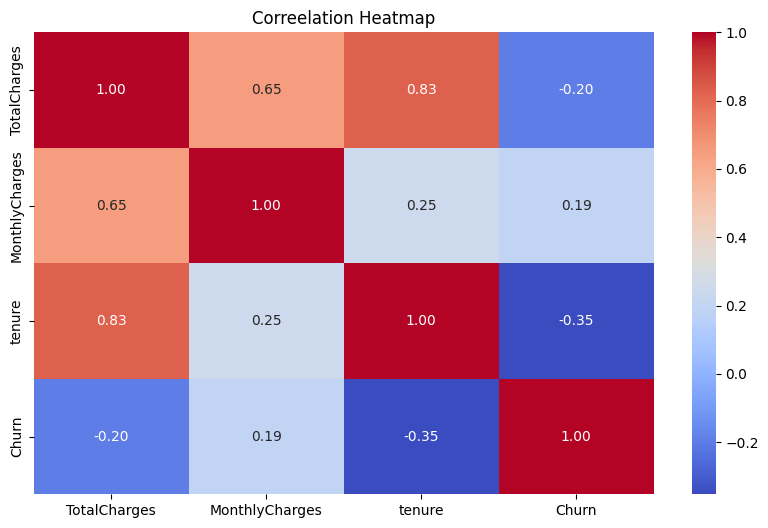

In [23]:
numerical_columns= ['TotalCharges', 'MonthlyCharges','tenure','Churn']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correelation Heatmap')
plt.show()

As Mario delves deeper into the Data Kingdom, he uncovers a magical **heatmap**, a treasure trove of connections between the kingdom's most cruscial features. Mario is now understand the relationships that drive loyalty, or lead residents to `Churn`. 
1. **The Protective Shield (`tenure` and `Churn`)**
    - The longer a resident stays (Higher `tenure`), the lower their likelihood to `Churn`. This mirros Mario's finding that two-year contracts have the lowest `churn` rates (2.8%), while newer residents are the most vulnerable.
2. **The Gold Investment (`TotalCharges` and `Churn`)**
    - Higher `TotalCharges` slightly lower `Churn`, but the impact isn't as strong as `tenure`. This echoes with Mario's earlier observation that higher lifetime spending (long-term contract holders) indicates loyalty, but it's not the only factor
3. **The Price Trap (`MonthlyCharges` and `Churn`)**
    - Higher `MonthlyCharges` slightly increase `Churn` risk. Mario had already identified this trap during his segmentation of `MonthlyCharges`, where `Churn` peaked in the 60-90 coins range

### Level 2 Insight

Through Mario's exploration of the Data Kingdom, we've identified key facotrs influencing resident behavior and `churn`. Financial aspects like `MonthlyCharges` and `TotalCharges`, along with `contract types` and `tenure`, play significant roles in retention. Our analysis shows that **mid-range payers** (30-90 coins) and **month-to-month** contract holders are most vulnerable, highlighting the need for targeted interventions.
Recommendation : 
* Offer tailored discounts and perks to mid-range payers (30-90 coins) to improve retention
* Encourage long-term contracts by offering loyalty rewards or additional benefits for **one-year** or **two-year** commitments.

The challenges faced by **Single** Explorers and residents **without TechSupport** also point to the importance of connection and support.
Recommendation : 
* Foster community engagement and offer exclusive perks for **Single** Explorers to reduce `churn`
* Expand `TechSupport` services to ensure residents feel valued and supported

Mario's heatmap revealed the interconnectedness of `tenure`, `TotalCharges`, and `MonthlyCharges` with `Churn`, emphasizing the need for a holistic retention strategy.
Recommendation : 
* Adpot a balanced approach by combining competitive pricing with enhanced support services to reduce `Churn` across all resident groups

---------------------------------

# Feature Engineering

In [24]:
# Split Feature and Target
x = df.drop(['Churn'], axis=1)
y = df['Churn']
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [25]:
# Missing Value Check
missing_value = x.isnull().sum()
missing_percentarge = (missing_value / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values' : missing_value,
    'Percentage' : missing_percentarge
})

print (missing_data[missing_data['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [26]:
#skewness check
num_cols = [col for col in x.select_dtypes(exclude=['object', 'category']).columns]
cat_cols = [col for col in x.select_dtypes(include=['object', 'category']).columns]

skewness_numerical = pd.DataFrame({
    'column name':num_cols,
    'skewness_score':[round(x[col].skew(), 1) for col in num_cols],
    'distribution':['normal' if -0.5 <= round(x[col].skew(), 1) <= 0.5 else 'skewed' for col in num_cols]
})


skewness_categorical = pd.DataFrame({
    'column_name' : cat_cols,
    'top_value': [x[col].value_counts().idxmax() for col in cat_cols],
    'top_frequency':[x[col].value_counts().max() for col in cat_cols],
    'unique_values':[x[col].nunique() for col in cat_cols]
}).assign(
    distribution = lambda df: df['top_frequency'] / len(x)
)

print ("Numerical Column Skewness: ")
print (skewness_numerical)
print ("\nCategorical Column Frequency Distribution:")
skewness_categorical

Numerical Column Skewness: 
      column name  skewness_score distribution
0          tenure             0.2       normal
1  MonthlyCharges            -0.2       normal
2    TotalCharges             1.0       skewed

Categorical Column Frequency Distribution:


,column_name,top_value,top_frequency,unique_values,distribution
0,customerID,3186-AJIEK,1,7043,0.000142
1,gender,Male,3555,2,0.504756
2,SeniorCitizen,No,5901,2,0.837853
3,Partner,No,3641,2,0.516967
4,Dependents,No,4933,2,0.700412
5,PhoneService,Yes,6361,2,0.903166
6,MultipleLines,No,3390,3,0.481329
7,InternetService,Fiber optic,3096,3,0.439585
8,OnlineSecurity,No,3498,3,0.496663
9,OnlineBackup,No,3088,3,0.438450


In [27]:
# Outlier Checks
def hitung_limit(col, distype):
    """
    Calculate the lower and upper bounds for outlier detection based on the specified distribution type.

    Parameters:
    col (str): The name of the column in the DataFrame for which the bounds are calculated.
    distype (str): The type of distribution to use for outlier detection. 
                   It can be either 'skewed' (for skewed distributions) or any other value for normal distributions.

    Returns:
    tuple: A tuple containing the lower and upper bounds for outlier detection.
           These bounds are calculated using different methods based on the distribution type:
           - For 'skewed' distribution, bounds are calculated using the Interquartile Range (IQR).
           - For other distributions (assumed to be normal), bounds are calculated using the mean and standard deviation.
    """
    if distype == 'skewed':
        IQR = x[col].quantile(0.75) - x[col].quantile(0.25)
        lower = x[col].quantile(0.25) - (IQR * 3)
        upper = x[col].quantile(0.75) + (IQR * 3)
    else:
        lower = x[col].mean() - 3*x[col].std()
        upper = x[col].mean() + 3*x[col].std()
    return lower, upper

outliers = pd.DataFrame({
    'column': skewness_numerical['column name'],
    'distribution':skewness_numerical['distribution'],
    'lower_boundary':[round(hitung_limit(col, distype)[0], 2) for col, distype in zip(skewness_numerical['column name'], skewness_numerical['distribution'])],
    'upper_boundary':[round(hitung_limit(col, distype)[1], 2) for col, distype in zip(skewness_numerical['column name'], skewness_numerical['distribution'])],
    'persentase':[
        round(((x[col] > upper).sum() + (x[col] < lower).sum()) / len(x) * 100, 2)
        for col, dist in zip(skewness_numerical['column name'], skewness_numerical['distribution'])
        for lower, upper in [hitung_limit(col, dist)]
    ]
})

outliers
                                            

,column,distribution,lower_boundary,upper_boundary,persentase
0,tenure,normal,-41.31,106.05,0.0
1,MonthlyCharges,normal,-25.51,155.03,0.0
2,TotalCharges,skewed,-9765.60,13950.75,0.0


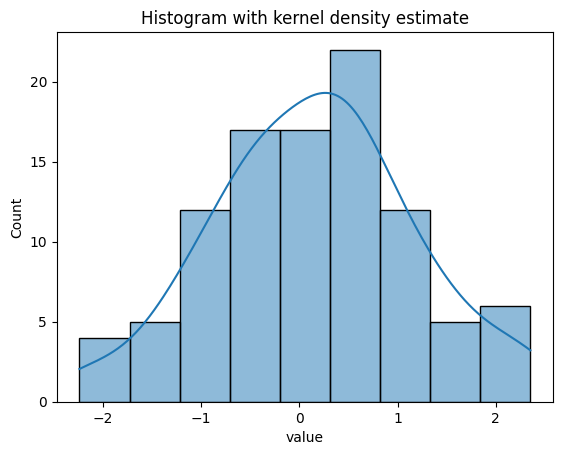

Statistic: 0.9902828105979178, p-value: 0.6874633903067159
Data is normally distributed (fail to reject H0)


In [28]:
#Normality Test
data = np.random.normal(loc=0, scale=1, size=100)
normality_df = pd.DataFrame(data, columns=['value'])

sns.histplot(normality_df['value'], kde=True)
plt.title('Histogram with kernel density estimate')
plt.show()

stat, p_value = shapiro(normality_df['value'])
print (f'Statistic: {stat}, p-value: {p_value}')

if p_value > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print ("Data is not normally distributed (Reject H0)")

In [29]:
#Feature Selection

num_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = x.select_dtypes(include=['object','category']).columns.tolist()

results=[]

#numerical columns
for col in num_cols:
    if x[col].nunique() > 1 :
        p_value = pearsonr(x[col], y)[1]
        p_value_text = 'Correlated' if p_value < 0.05 else 'Not Correlated'
    else:
        p_value_text = 'Not Correlated'
    results.append((col, p_value_text))

#categorical columns
for col in cat_cols:
    contingency_table = pd.crosstab(x[col], y)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    p_value_text = 'Correlated' if p_value < 0.05 else 'Not Correlated'
    results.append((col, p_value_text))

results_df = pd.DataFrame(results, columns = ['Column Name', 'Results'])
results_df

,Column Name,Results
0,tenure,Correlated
1,MonthlyCharges,Correlated
2,TotalCharges,Correlated
3,customerID,Not Correlated
4,gender,Not Correlated
5,SeniorCitizen,Correlated
6,Partner,Correlated
7,Dependents,Correlated
8,PhoneService,Not Correlated
9,MultipleLines,Correlated


In [30]:
#drop non-correlated column from features (x)
x = x.drop(columns=['customerID','gender','PhoneService'], axis=1)
x.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,No,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,No,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,No,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,No,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [31]:
#split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print (f"Train size: {x_train.shape}")
print (f"Test Size : {x_test.shape}")

Train size: (5634, 17)
Test Size : (1409, 17)


In [32]:
#upsampling the minority class for train set
train_data = pd.concat([x_train, y_train], axis=1)

majority = train_data[train_data[y.name] == 0]
minority = train_data[train_data[y.name] == 1]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

train_data_upsampled = pd.concat([majority, minority_upsampled])

x_train_upsampled = train_data_upsampled.drop(columns=[y.name])
y_train_upsampled = train_data_upsampled[y.name]

print (f"Train size: {x_train_upsampled.shape}")
print (f"Test size: {y_train_upsampled.shape}")

Train size: (8278, 17)
Test size: (8278,)


In [33]:
#cardinality checks
cat_cols = x_train_upsampled.select_dtypes(include=['object','category']).columns.tolist()

cardinality = pd.DataFrame({
    'column_name':cat_cols,
    'cardinality':[x_train_upsampled[col].nunique() for col in cat_cols]
})

cardinality

,column_name,cardinality
0,SeniorCitizen,2
1,Partner,2
2,Dependents,2
3,MultipleLines,3
4,InternetService,3
5,OnlineSecurity,3
6,OnlineBackup,3
7,DeviceProtection,3
8,TechSupport,3
9,StreamingTV,3


In [34]:
#Preprocessing
num_cols = x_train_upsampled.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = x_train_upsampled.select_dtypes(include=['object','category']).columns.tolist()

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

As Mario continued his journey through the Data Kingdom, he focused on refining the data to ensure its readiness for deeper exploration.  
First, he **separated** the `features` from the `target`, ensuring a clear distinction. He quickly checked for **missing values**, disovering none, and confirmed that the `features` followed a **normal distribution**. He also examined the data for **skewness** and **outliers** but found no issue that would disrupt his progress.   
With this foundation, Mario performed **feature selection**, dropping any non-correlated columns that didn't contribute to understanding the residents' behavior. To ensure the model would be well-equipped for future predictions, he **split the data** into `training` and `testing sets`, while addressing class **imbalance** by **upsampling** the minority class in the training set. After confirming no high **cardinality** in the `features`, Mario **scaled** and **encoded** the data using a streamlined **pipeline** to make sure every aspect was optimized for the next phase of his journey.

# Model Definition

In [35]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In the next stage of his adventure, Mario crafted a powerful **model** to navigate the challenges of the Data Kingdom. He built a **model** pipeline, combining a **preprocessor** to handle **data transformations** and a **RandomForestClassifier** as the core of his prediction engine. With the preprocessor ensuring the data was properly prepared, the classifier would take charge, making decisions based on the rich insights Mario had uncovered. Using a **random_state** for consistency, Mario set the stage for reliable and reproducible results as he continued his quest to predict the residents' behavior and churn rates

---------------------------

# Model Training

In [36]:
model_pipeline.fit(x_train_upsampled, y_train_upsampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [37]:
## Hyperparameter Tuning
param_grid_rf = {
    'classifier__n_estimators':randint(50, 500),
    'classifier__max_depth': [None] + list(range(10, 101, 10)),
    'classifier__min_samples_split':randint(2, 20),
    'classifier__min_samples_leaf':randint(1, 20),
    'classifier__max_features':['sqrt','log2', None],
    'classifier__bootstrap': [True, False]
}

scoring = ['f1_weighted']

random_search_rf = RandomizedSearchCV(
    model_pipeline,
    param_distributions=param_grid_rf,
    n_iter=50,
    scoring=scoring,
    refit='f1_weighted',
    cv=3,
    n_jobs=-1,
    random_state=42
)

In [38]:
random_search_rf.fit(x_train_upsampled, y_train_upsampled)

best_params_rs = random_search_rf.best_params_
best_score_rs = random_search_rf.best_score_

print(f"Best Hyperparameter : {best_params_rs}")
print(f"Best Score : {best_score_rs}")

Best Hyperparameter : {'classifier__bootstrap': False, 'classifier__max_depth': 80, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 353}
Best Score : 0.8800023180319081


In [39]:
best_result_rs = random_search_rf.best_estimator_
best_result_rs

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=80,
                                        min_samples_leaf=2, n_estimators=353,
                                        random_state=42))])

As Mario ventured deeper into the model-building realm, he focused on training his powerful creation. He first trained his **model pipeline** using the upsampled training data (`x_train_upsampled`, `y_train_upsampled`) to enhance its learning capacity. But the journey didn't stop there. Mario knew that to master the art of prediction, fine-tuning the model was essential. He turned to **Hyperparameter Tuning** to optimize his model's performance.

He used **RandomizedSearchCV** to search through a wide range of hyperparameters for the **RandomForestClassifier** embedded in his pipeline. Mario specified several parameters like **n_estimators**, **max_depth**, and **min_samples_split**, along with options for **max_features** and **bootstrap**. The search was set to run over 50 iterations with a cross-validation of 3, optimizing for the **f1_weighted** score.

Upon completing the search, Mario discovered the best set of parameters: a **max_depth** of 80, sqrt as the **max_features** method, and 353 estimators. The best score he achieved from this fine-tuning was **0.88**, a promising result that confirmed his model's potential. The final optimized model, now ready for the next step, would help Mario tackle the problem of `churn` prediction with even greater precision.

----------------------------------

# Model Evaluation

In [40]:
y_pred = best_result_rs.predict(x_test)
report_rf = classification_report(y_test, y_pred, output_dict=True)
f1_score_rf = report_rf['weighted avg']['f1-score']

cv_result = cross_validate(
    best_result_rs,
    x_train_upsampled,
    y_train_upsampled,
    cv=5,
    scoring=['f1_weighted'],
    return_train_score=False
)

f1_score_rf = cv_result['test_f1_weighted']
mean_f1_rf = f1_score_rf.mean()
std_f1_rf = f1_score_rf.std()

summary_rf = pd.DataFrame({
    'Model Name': 'Random Forest Classifier',
    'Classifier': 'RandomForestClassifier',
    'F1 Score': f1_score_rf,
    'F1 Score Cross Validation (Mean)': mean_f1_rf,
    'F1 Score Cross Validation (Std)': std_f1_rf
})

summary_rf

,Model Name,Classifier,F1 Score,F1 Score Cross Validation (Mean),F1 Score Cross Validation (Std)
0,Random Forest Classifier,RandomForestClassifier,0.895949,0.896111,0.008197
1,Random Forest Classifier,RandomForestClassifier,0.904495,0.896111,0.008197
2,Random Forest Classifier,RandomForestClassifier,0.904428,0.896111,0.008197
3,Random Forest Classifier,RandomForestClassifier,0.893300,0.896111,0.008197
4,Random Forest Classifier,RandomForestClassifier,0.882380,0.896111,0.008197


### Level 3 Insight

As Mario continued on his path, he turned his focus to **model evaluation**. The model, now fine-tuned, needed to prove its worth against unseen data. With a deep breath, Mario tested the model’s performance on the **test set**. He used the optimized Random Forest Classifier to make predictions (`y_pred`) and generated a classification report to measure accuracy and performance across various metrics. The F1 score, a key indicator of the model's ability to balance precision and recall, stood at an impressive **0.89** for the weighted average.

Mario didn’t stop there; he understood the importance of assessing model stability. He ran **cross-validation** with **five splits** on the upsampled training data, and the F1 scores averaged out to **0.896**, with a small standard deviation of **0.008**. This confirmed that his model performed consistently across different data subsets. The results were displayed in a summary dataframe, where he observed the high performance and low variability of the model.

Business Recommendation: Given the model's strong performance and the high **F1 score**, Mario recommended that **Kingdom** use this model for predicting resident `churn`. By integrating it into their resident management system, Kingdom can identify at-risk residents early and take proactive steps to retain them. The model's consistency across different data sets suggests that it is both reliable and scalable, making it a suitable tool for long-term use in churn prediction. For maximum impact, **Kingdom** should focus on residents with lower scores (those likely to churn) and explore tailored retention strategies based on predicted behaviors.

-----------------------

# Model Inferences

In [41]:
new_data = pd.read_csv('Odyssey 1 New Data.csv')
new_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Male,0,Yes,No,35,Yes,No phone service,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,69.417,1559.041,NaN
1,2,Female,1,No,Yes,72,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,One year,No,Bank transfer (automatic),83.183,5440.281,NaN
2,3,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),52.615,2847.151,NaN
3,4,Female,1,No,No,62,Yes,Yes,No,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,101.115,3457.983,NaN
4,5,Male,0,Yes,Yes,12,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,57.368,688.720,NaN


In [42]:
x_new = new_data.drop(['Churn', 'customerID','gender','PhoneService'], axis=1)
y_new = new_data['Churn']
x_new['SeniorCitizen'] = x_new['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

num_cols = x_new.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = x_new.select_dtypes(include=['object','category']).columns.tolist()

for col, categories in zip(cat_cols, preprocessor.named_transformers_['cat']['encoder'].categories_):
    x_new[col] = pd.Categorical(x_new[col], categories=categories)


In [43]:
x_new_transformed = preprocessor.transform(x_new)
y_new_pred = best_result_rs.named_steps['classifier'].predict(x_new_transformed)


In [44]:
class_labels = {0: "No Churn", 1: "Churn"}
y_new_pred_labelled = [class_labels[pred] for pred in y_new_pred]

result_df = x_new.copy()
result_df['Prediction'] = [class_labels[pred] for pred in y_new_pred]

result_df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Prediction
0,No,Yes,No,35,No phone service,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,69.417,1559.041,Churn
1,Yes,No,Yes,72,Yes,DSL,Yes,Yes,No,Yes,No,Yes,One year,No,Bank transfer (automatic),83.183,5440.281,No Churn
2,No,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),52.615,2847.151,No Churn
3,Yes,No,No,62,Yes,No,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,101.115,3457.983,No Churn
4,No,Yes,Yes,12,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,57.368,688.720,No Churn
